<a href="https://colab.research.google.com/github/Jesus-Vazquez-A/Tensorflow/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

## *Load Data*

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/insurence_clearv2.csv")

After cleaning the data, eliminating outliers that may affect the performance of the algorithm, we will divide the predictor variables and the labels, then create partitions for training data and model evaluation.

## *Split Data*

In [4]:
def load_inputs_outputs():

  X = df.drop(columns = ['charges'])
  y = df[['charges']]

  return X,y

In [5]:
X,y = load_inputs_outputs()

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.33,random_state = 42)

## *One Hot Transform*

In [8]:
def ohe(data):

  return pd.get_dummies(data,drop_first = True)

In [9]:
X_train,X_test = ohe(X_train),ohe(X_test)

## *Scaler Data*

Because the variables can have different units of measurement, it is recommended to make a scale adjustment so that the variables can be compared with each other.

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

In [12]:
scaler_x.fit(X_train)
scaler_y.fit(Y_train)

StandardScaler()

The fit method calculates the mean and the standard deviation to later perform the scale adjustment.

In [13]:
X_train_scaler = scaler_x.transform(X_train)
X_test_scaler = scaler_x.transform(X_test)

Y_train_scaler = scaler_y.transform(Y_train)
Y_test_scaler = scaler_y.transform(Y_test)

## *Array Transform*

Transforming the data to numpy arrays makes training faster and the data consumes less memory.

In [14]:
def array(x):
  return np.asarray(x)

In [15]:
X_train_scaler,X_test_scaler = array(X_train_scaler),array(X_test_scaler)

Y_train_scaler,Y_test_scaler = array(Y_train_scaler),array(Y_test_scaler)

## **Neurolal Networks**

In [16]:
import tensorflow.keras as tf

In [17]:
X_train.shape[1]

9

## *First Model*

In [18]:
model = tf.Sequential()
model.add(tf.layers.Dense(units = 500,activation = 'relu',input_dim = 9))
model.add(tf.layers.Dense(units = 250,activation = 'relu'))
model.add(tf.layers.Dense(units = 250,activation = 'relu'))
model.add(tf.layers.Dense(units = 1,activation = 'linear'))

* **Input layer**: It has 500 neurons and received nine predictor variables.
* **Hidden Layers**: Both hidden layers have half the number of neurons.
* **Output Layer**: It will be the layer that generates the prediction. In this case, the prediction can only be a single value.

In [19]:
model.compile(loss = 'mse',optimizer = 'adam',metrics = ['mse'])

The lost function for regression cases is the mean square error, the optimizer will be adam, which in most cases works quite well.

In [20]:
history = model.fit(X_train_scaler,
                    Y_train_scaler,
                    validation_data = (X_test_scaler,
                                       Y_test_scaler),
                    batch_size = 32,
                    validation_batch_size = 32,
                    epochs = 1000)

Epoch 1/1000
28/28 [==============================] - 3s 10ms/step - loss: 0.1848 - mse: 0.1848 - val_loss: 0.0335 - val_mse: 0.0335
Epoch 2/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 3/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0271 - mse: 0.0271 - val_loss: 0.0315 - val_mse: 0.0315
Epoch 4/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 5/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0200 - val_mse: 0.0200
Epoch 6/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0193 - val_mse: 0.0193
Epoch 7/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 8/1000
28/28 [==============================] - 0s 5ms/step - loss: 0

In [21]:
sns.set_style(style = 'whitegrid')

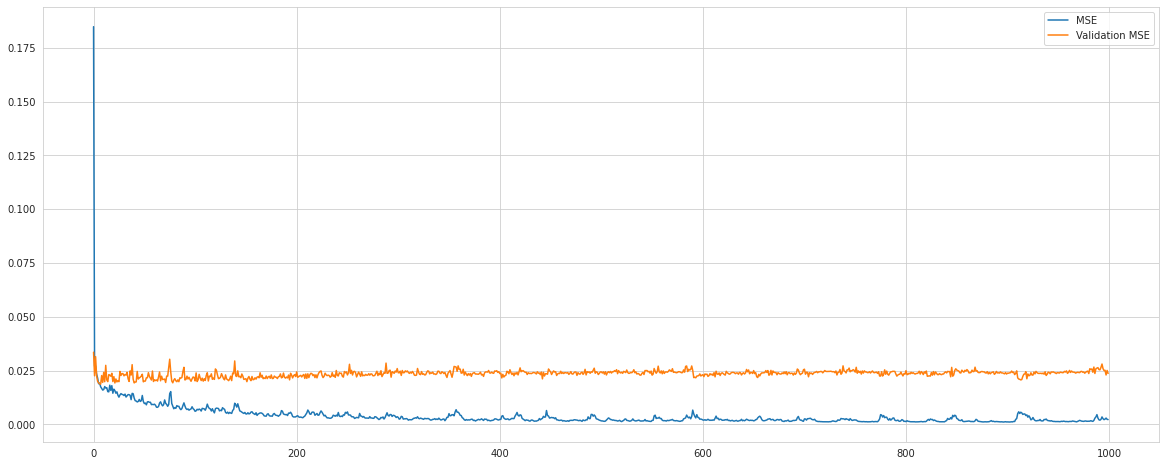

In [22]:
fig = plt.subplots(1,1,figsize = (20,8))
_ = plt.plot(history.history['mse'],label = 'MSE')
_ = plt.plot(history.history['val_mse'],label = 'Validation MSE')
plt.legend()
plt.show()

From epoch number 100 there is no significant improvement for the validation data compared to the training data, so the model may have a slight overweight of the data.

## *Second Model*

In [26]:
def build_model():

  model = tf.Sequential([
      
      tf.layers.Dense(units = 64,activation = 'relu',input_dim = 9),
      tf.layers.Dense(units = 32,activation = 'relu'),
      tf.layers.Dense(units = 32,activation = 'relu'),
      tf.layers.Dropout(rate = 0.2),
      tf.layers.Dense(units = 1,activation = 'linear')

  ])

  return model

* **Input layer**: It has 64 neurons and received nine predictor variables.
* **Hidden Layers**: Both hidden layers have half the number of neurons.
* **Drouput Layer**: Deactivate a percentage of the neurons so that the model forgets irrelevant data that could bias the model.
* **Output Layer**: It will be the layer that generates the prediction. In this case, the prediction can only be a single value.



In [27]:
model = build_model()

In [28]:
model.compile(loss = 'mse',optimizer = 'adam',metrics = ['mse'])

In [29]:
early_stop = tf.callbacks.EarlyStopping(patience=5,restore_best_weights=True)

The **EarlyStopping** function offers an early stop if the loss function does not decrease for the validation data, the model will stop preventing it from overtraining.

In [30]:
history = model.fit(X_train_scaler,
                    Y_train_scaler,
                    validation_data = (X_test_scaler,
                                       Y_test_scaler),
                    batch_size = 32,
                    validation_batch_size = 32,
                    epochs = 64)

Epoch 1/64
28/28 [==============================] - 1s 10ms/step - loss: 0.8134 - mse: 0.8134 - val_loss: 0.4779 - val_mse: 0.4779
Epoch 2/64
28/28 [==============================] - 0s 5ms/step - loss: 0.2764 - mse: 0.2764 - val_loss: 0.0847 - val_mse: 0.0847
Epoch 3/64
28/28 [==============================] - 0s 4ms/step - loss: 0.1059 - mse: 0.1059 - val_loss: 0.0476 - val_mse: 0.0476
Epoch 4/64
28/28 [==============================] - 0s 4ms/step - loss: 0.1009 - mse: 0.1009 - val_loss: 0.0386 - val_mse: 0.0386
Epoch 5/64
28/28 [==============================] - 0s 4ms/step - loss: 0.0668 - mse: 0.0668 - val_loss: 0.0361 - val_mse: 0.0361
Epoch 6/64
28/28 [==============================] - 0s 4ms/step - loss: 0.0718 - mse: 0.0718 - val_loss: 0.0320 - val_mse: 0.0320
Epoch 7/64
28/28 [==============================] - 0s 5ms/step - loss: 0.0737 - mse: 0.0737 - val_loss: 0.0318 - val_mse: 0.0318
Epoch 8/64
28/28 [==============================] - 0s 5ms/step - loss: 0.0654 - mse: 0.0

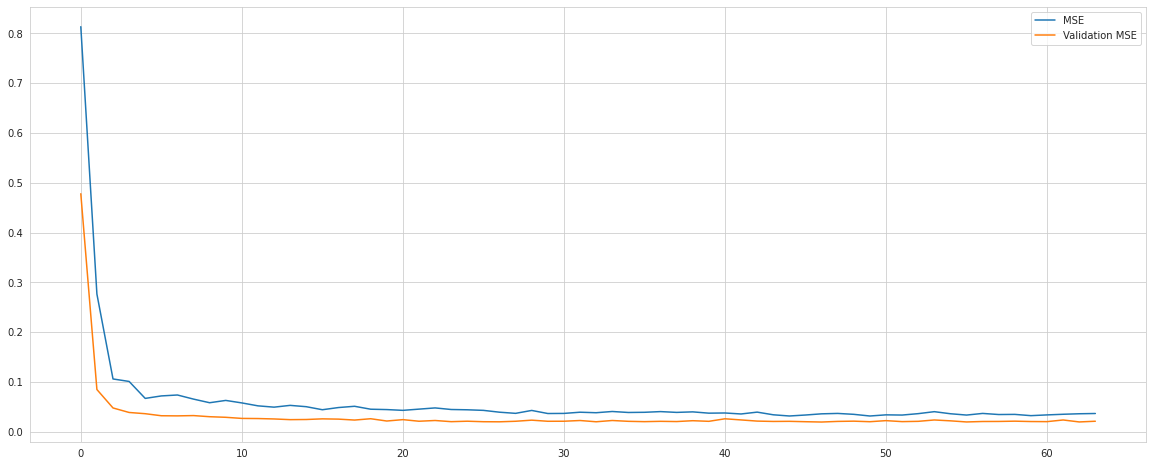

In [31]:
fig = plt.subplots(1,1,figsize = (20,8))
_ = plt.plot(history.history['mse'],label = 'MSE')
_ = plt.plot(history.history['val_mse'],label = 'Validation MSE')
plt.legend()
plt.show()

From epoch number 29 there is no significant improvement for the lost function of the evaluation data, for which the model decided to stop the training.

## **Save Model**

In [34]:
model.save('model.h5')